In [111]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from used_bike_price_predictor import X_train, y_train

In [112]:
df = pd.read_csv("./data/oral_cancer_prediction_dataset.csv")
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [114]:
df.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

In [115]:
df = df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})
df

C:\Users\Asindu De Silva\AppData\Local\Temp\ipykernel_20624\1629557759.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,0,1,1,1,0,0,1,...,0,0,0.000000,0,No Treatment,100.000000,0.00,0,0,0
1,2,Japan,64,1,1,1,1,0,1,1,...,0,0,1.782186,1,No Treatment,83.340103,77772.50,177,0,1
2,3,UK,37,0,0,1,0,0,1,1,...,0,1,3.523895,2,Surgery,63.222871,101164.50,130,1,1
3,4,Sri Lanka,55,1,1,1,0,1,0,1,...,0,0,0.000000,0,No Treatment,100.000000,0.00,0,1,0
4,5,South Africa,68,1,0,0,0,0,0,1,...,0,0,2.834789,3,No Treatment,44.293199,45354.75,52,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,84918,USA,46,1,1,0,0,0,0,1,...,0,1,0.000000,0,No Treatment,100.000000,0.00,0,1,0
84918,84919,USA,41,1,1,1,0,0,0,0,...,1,1,0.000000,0,No Treatment,100.000000,0.00,0,1,0
84919,84920,Taiwan,72,1,1,1,0,1,0,1,...,0,0,4.777394,1,Surgery,85.633426,81352.50,90,0,1
84920,84921,Japan,67,1,1,0,0,0,0,0,...,1,0,0.000000,0,No Treatment,100.000000,0.00,0,1,0


In [116]:
df.describe().corr()

,ID,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Family History of Cancer,...,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
ID,1.000000,0.520830,0.520120,0.520118,0.520120,0.520120,0.520120,0.520116,0.520120,0.520116,...,0.520116,0.520116,0.520120,0.520161,0.520143,0.520937,0.837279,0.521624,0.520120,0.520120
Age,0.520830,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.249597,0.999999,1.000000,1.000000
Gender,0.520120,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.248952,0.999998,1.000000,1.000000
Tobacco Use,0.520118,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.248948,0.999998,1.000000,1.000000
Alcohol Consumption,0.520120,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.248952,0.999998,1.000000,1.000000
HPV Infection,0.520120,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.248956,0.999998,1.000000,1.000000
Betel Quid Use,0.520120,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.248956,0.999998,1.000000,1.000000
Chronic Sun Exposure,0.520116,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.248953,0.999998,1.000000,1.000000
Poor Oral Hygiene,0.520120,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.248956,0.999998,1.000000,1.000000
Family History of Cancer,0.520116,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.248953,0.999998,1.000000,1.000000


In [117]:
df = df.drop(columns=['ID','Country','Diet (Fruits & Vegetables Intake)','Cancer Stage','Treatment Type','Survival Rate (5-Year, %)','Cost of Treatment (USD)','Economic Burden (Lost Workdays per Year)'])
df

,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Early Diagnosis,Oral Cancer (Diagnosis)
0,36,0,1,1,1,0,0,1,0,0,0,0,0,0,0.000000,0,0
1,64,1,1,1,1,0,1,1,0,0,0,1,0,0,1.782186,0,1
2,37,0,0,1,0,0,1,1,0,0,0,0,0,1,3.523895,1,1
3,55,1,1,1,0,1,0,1,0,0,1,0,0,0,0.000000,1,0
4,68,1,0,0,0,0,0,1,0,0,0,0,0,0,2.834789,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,46,1,1,0,0,0,0,1,0,0,0,0,0,1,0.000000,1,0
84918,41,1,1,1,0,0,0,0,0,1,0,0,1,1,0.000000,1,0
84919,72,1,1,1,0,1,0,1,1,0,0,0,0,0,4.777394,0,1
84920,67,1,1,0,0,0,0,0,0,0,1,0,1,0,0.000000,1,0


In [118]:
df.corr()

,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Early Diagnosis,Oral Cancer (Diagnosis)
Age,1.000000,0.006699,-0.002956,0.004203,0.000654,-0.000492,0.001241,0.007398,0.002745,-0.000198,0.000410,0.003112,0.001861,-0.001730,0.001974,0.000363,0.002308
Gender,0.006699,1.000000,-0.000606,0.002252,-0.003842,0.001163,0.005901,0.002725,0.002475,-0.000347,-0.004592,0.004973,-0.002658,-0.002899,-0.000457,-0.004099,0.000368
Tobacco Use,-0.002956,-0.000606,1.000000,0.002585,-0.001543,-0.002488,-0.000089,-0.002865,-0.001410,-0.001800,0.004833,-0.008031,-0.005463,0.005109,0.006134,0.006836,0.001896
Alcohol Consumption,0.004203,0.002252,0.002585,1.000000,0.001577,0.000070,0.006014,0.005483,-0.000563,0.001200,0.003642,0.003917,0.001541,-0.004099,0.001273,-0.000532,-0.001602
HPV Infection,0.000654,-0.003842,-0.001543,0.001577,1.000000,0.004885,0.000729,0.001396,0.003244,-0.008817,-0.005610,-0.000792,0.001247,-0.004028,-0.002112,-0.006398,-0.000412
Betel Quid Use,-0.000492,0.001163,-0.002488,0.000070,0.004885,1.000000,-0.004162,-0.003185,0.003246,0.001619,-0.000937,0.005178,0.000499,0.001143,0.001454,-0.000987,0.001608
Chronic Sun Exposure,0.001241,0.005901,-0.000089,0.006014,0.000729,-0.004162,1.000000,-0.002924,0.000695,0.000316,-0.005006,0.003741,0.002606,0.000935,0.000418,-0.003156,-0.000960
Poor Oral Hygiene,0.007398,0.002725,-0.002865,0.005483,0.001396,-0.003185,-0.002924,1.000000,0.000824,-0.000178,0.002022,-0.004777,0.008322,-0.001047,-0.003759,0.000848,-0.004885
Family History of Cancer,0.002745,0.002475,-0.001410,-0.000563,0.003244,0.003246,0.000695,0.000824,1.000000,-0.001902,-0.007293,0.001042,-0.002801,0.006734,0.001064,-0.000711,0.001190
Compromised Immune System,-0.000198,-0.000347,-0.001800,0.001200,-0.008817,0.001619,0.000316,-0.000178,-0.001902,1.000000,0.002402,-0.001123,-0.002145,-0.004312,0.004737,0.000893,0.005500


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Tobacco Use'}>,
        <Axes: title={'center': 'Alcohol Consumption'}>],
       [<Axes: title={'center': 'HPV Infection'}>,
        <Axes: title={'center': 'Betel Quid Use'}>,
        <Axes: title={'center': 'Chronic Sun Exposure'}>,
        <Axes: title={'center': 'Poor Oral Hygiene'}>],
       [<Axes: title={'center': 'Family History of Cancer'}>,
        <Axes: title={'center': 'Compromised Immune System'}>,
        <Axes: title={'center': 'Oral Lesions'}>,
        <Axes: title={'center': 'Unexplained Bleeding'}>],
       [<Axes: title={'center': 'Difficulty Swallowing'}>,
        <Axes: title={'center': 'White or Red Patches in Mouth'}>,
        <Axes: title={'center': 'Tumor Size (cm)'}>,
        <Axes: title={'center': 'Early Diagnosis'}>],
       [<Axes: title={'center': 'Oral Cancer (Diagnosis)'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

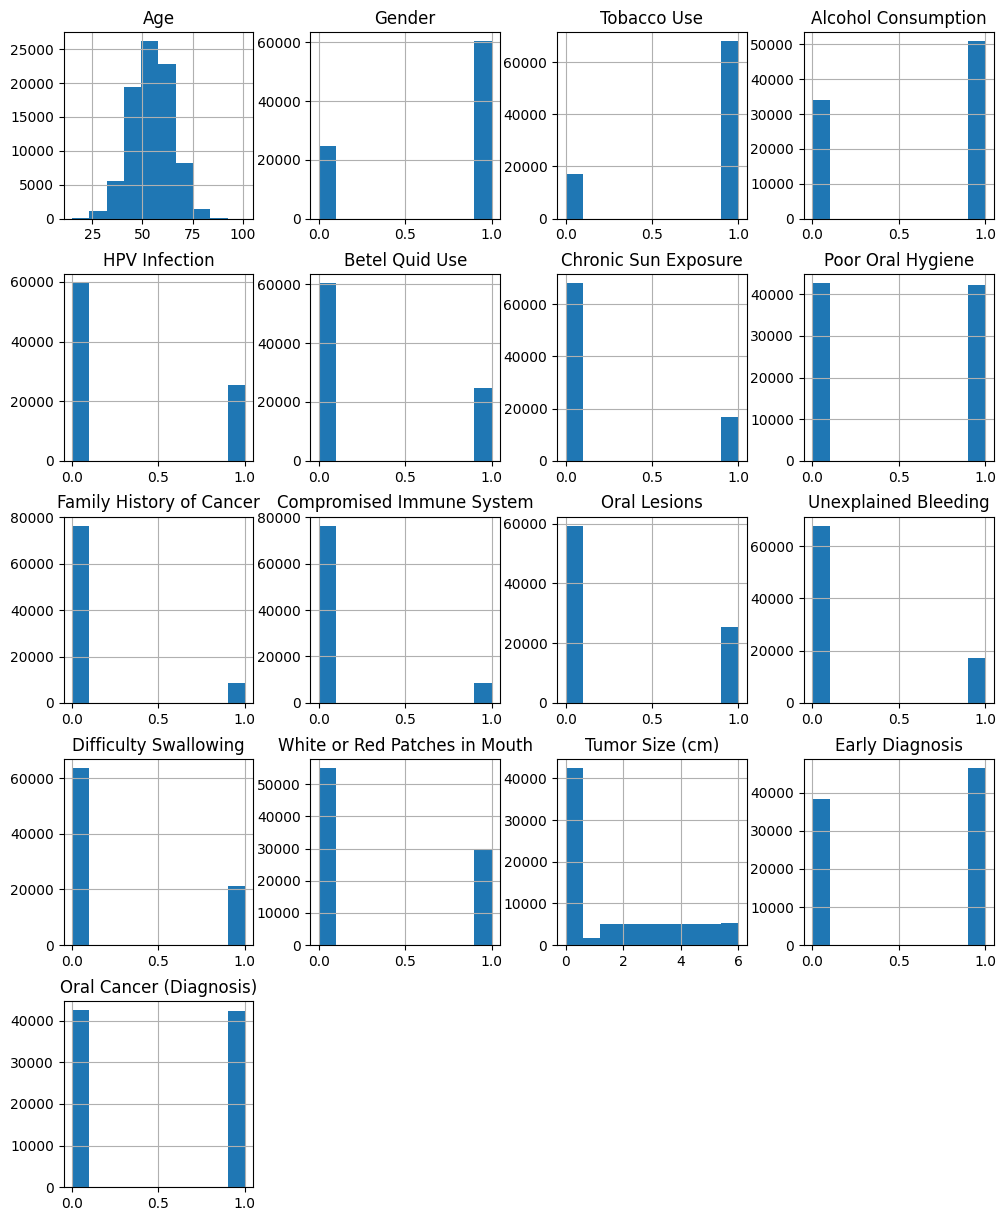

In [119]:
df.hist(figsize=(12,15))

In [120]:
X = df[['Tobacco Use','Tumor Size (cm)']].to_numpy()
y = df['Oral Cancer (Diagnosis)']

print(X)
print(y)

[[1.         0.        ]
 [1.         1.78218591]
 [0.         3.52389483]
 ...
 [1.         4.77739416]
 [1.         0.        ]
 [1.         0.        ]]
0        0
1        1
2        1
3        0
4        1
        ..
84917    0
84918    0
84919    1
84920    0
84921    0
Name: Oral Cancer (Diagnosis), Length: 84922, dtype: int64


In [121]:
X_train, X_, y_train, y_ = train_test_split(X,y, test_size=0.4, random_state=50)
X_cv, X_test, y_cv, y_test = train_test_split(X,y, test_size=0.5, random_state=50)

del X_, y_

In [122]:
model = LogisticRegression()
model.fit(X_train,y_train)
yhat = model.predict(X_train)
print(accuracy_score(y_train, yhat))

yhat = model.predict(X_cv)
print(accuracy_score(y_cv, yhat))

yhat = model.predict(X_test)
print(accuracy_score(y_test, yhat))

print(yhat)
print(model.coef_)
print(model.intercept_)

1.0
1.0
1.0
[1 1 1 ... 0 1 1]
[[ 0.52102247 11.2530448 ]]
[-8.19497973]


In [124]:
print(model.predict([[1,0.7]]))

[1]
